In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np

In [103]:
data = pd.read_csv('finalSentimentdata2.csv',sep=',')
data.head()


,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [104]:
sentiment_map={'anger':-2,'fear':-1,'sad':1,'joy':2}
data.insert(2,'sentiment_int',[sentiment_map[s] for s in data.sentiment],True)
#data['sentiment_int']=[sentiment_map[s] for s in data.sentiment]
data.head()

,Unnamed: 0,sentiment,sentiment_int,text
0,3204,sad,1,agree the poor in india are treated badly thei...
1,1431,joy,2,if only i could have spent the with this cutie...
2,654,joy,2,will nature conservation remain a priority in ...
3,2530,sad,1,coronavirus disappearing in italy show this to...
4,2296,sad,1,uk records lowest daily virus death toll since...


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3090 non-null   int64 
 1   sentiment      3090 non-null   object
 2   sentiment_int  3090 non-null   int64 
 3   text           3090 non-null   object
dtypes: int64(2), object(2)
memory usage: 96.7+ KB


In [106]:
data.sentiment_int.value_counts()

-1    801
 1    795
-2    767
 2    727
Name: sentiment_int, dtype: int64

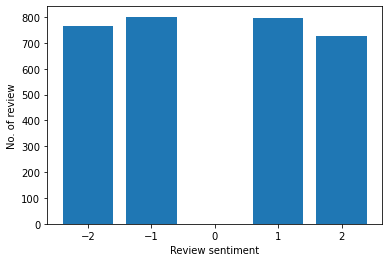

In [107]:
sentiment_count = data.groupby('sentiment_int').count()
plt.bar(sentiment_count.index.values,sentiment_count['text'])
plt.xlabel('Review sentiment')
plt.ylabel('No. of review')
plt.show()

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

def preProcessor(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    #print(token.tokenize(text))
    return text

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(data['text'])


In [109]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment_int'],test_size=0.3)

In [110]:
from sklearn.naive_bayes import *
from sklearn import metrics

clf=MultinomialNB()
#clf_gaus=GaussianNB()
#clf_ber=BernoulliNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)


0.6774541531823085

In [111]:
#Ber_NB
clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.6148867313915858

In [112]:
#svm
from sklearn.svm import LinearSVC

In [113]:
#linear
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.6645091693635383

In [114]:
# Polynomial Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)
pred=svclassifier.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.2686084142394822

In [115]:
#Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
pred=svclassifier.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.5706580366774542

In [116]:
#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)
pred=svclassifier.predict(x_test)
metrics.accuracy_score(y_test, pred)


0.645091693635383

In [117]:
# K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test, pred)


0.4487594390507012

In [118]:
# K=7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.4336569579288026

In [119]:
# K=4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.45307443365695793